In [9]:
import random
from dataclasses import dataclass
from typing import Literal

from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel, field_validator, ValidationError
from typing_extensions import TypedDict
from IPython.display import Image, display

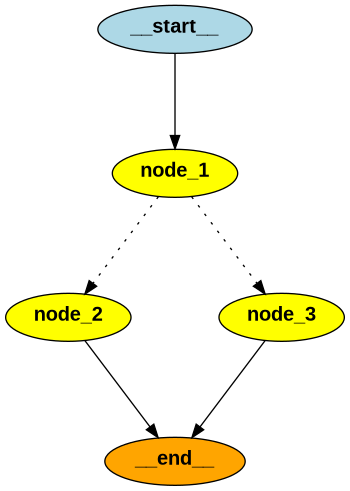

--- Node 1 ---
--- Node 2 ---


{'name': 'Lance is ... ', 'mood': 'happy'}

In [10]:
class TypedDictState(TypedDict):
    name: str
    mood: Literal["happy", "sad"]


def node_1(state):
    print("--- Node 1 ---")
    return {"name": state['name'] + " is ... "}

def node_2(state):
    print("--- Node 2 ---")
    return {"mood": "happy"}

def node_3(state):
    print("--- Node 3 ---")
    return {"mood": "sad"}

def decide_mood(state) -> Literal["node_2", "node_3"]:
    if random.random() < 0.5:
        return "node_2"
    return "node_3"


builder = StateGraph(TypedDictState)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_png()))

graph.invoke({"name": "Lance"})

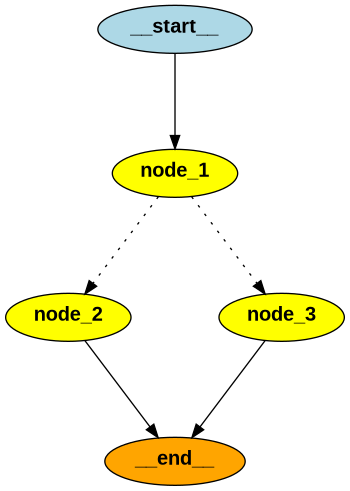

--- Node 1 ---
--- Node 3 ---


{'name': 'Lance is ... ', 'mood': 'sad'}

In [11]:
@dataclass
class DataclassState:
    name: str
    mood: Literal["happy", "sad"]


def node_1(state):
    print("--- Node 1 ---")
    return {"name": state.name + " is ... "}

builder = StateGraph(DataclassState)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_png()))

graph.invoke(DataclassState(name="Lance", mood="sad"))

In [12]:
class PydanticState(BaseModel):
    name: str
    mood: str

    @field_validator('mood')
    @classmethod
    def validate_mood(cls, value):
        if value not in ["happy", "sad"]:
            raise ValueError("Each mood must be either 'happy' or 'sad'")
        return value

try:
    state = PydanticState(name="Lance", mood="mad")
except ValidationError as e:
    print("Validation Error:", e)

Validation Error: 1 validation error for PydanticState
mood
  Value error, Each mood must be either 'happy' or 'sad' [type=value_error, input_value='mad', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error


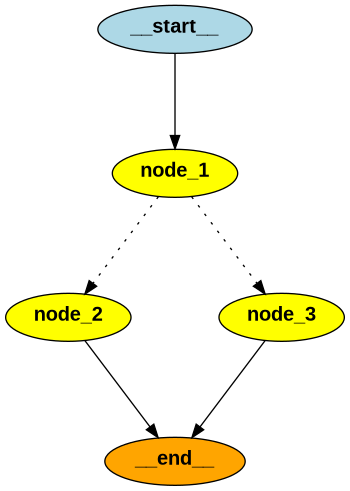

--- Node 1 ---
--- Node 3 ---


{'name': 'Lance is ... ', 'mood': 'sad'}

In [16]:
builder = StateGraph(PydanticState)

builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_png()))

graph.invoke(PydanticState(name="Lance", mood="sad"))